
# Web Science Course work (M) – Geo Localisation


### Import Packages and install Libraries


In [36]:
# !pip install nltk
# !pip install geopandas

In [37]:
# Standard library imports
import json
from collections import Counter

# Third party imports
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from shapely.geometry import Point
from collections import Counter


In [38]:
%cd C:\Users\Simran\Desktop\neccchv\Simran\data\datajson

C:\Users\Simran\Desktop\neccchv\Simran\data\datajson


In [39]:
files = [
    "geoLondonSep2022_1.json",
    "geoLondonSep2022_2.json",
    "geoLondonSep2022_3.json",
    "geoLondonSep2022_4.json",
    "geoLondonSep2022_5.json"
]

def config_JFiles(filename):
    result = list()
    for f1 in filename:
        with open(f1, 'r', encoding='utf-8') as infile:  # Specify encoding here
            result.extend(json.load(infile))

    with open('updated.json', 'w', encoding='utf-8') as output_file:  # And also here
        json.dump(result, output_file)

config_JFiles(files)

# Now reading the updated JSON data should not raise the UnicodeDecodeError
tweet_info = pd.read_json('updated.json') 


In [40]:
tweet_info

,_id,date,screen_name,qualityScore,text,url,description,listed_count,user_created,geo_enabled,...,location,followers_count,friends_count,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1565429028747616256,{'$date': '2022-09-01T19:58:59Z'},loststoryart,0.554386,"Just posted a photo @ London, United Kingdom h...",https://t.co/Ejo6POjL2A,Artist/Dreamer,0,{'$date': '2014-09-06T16:58:45Z'},True,...,"London, England",105,105,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
1,1565428982660603907,{'$date': '2022-09-01T19:58:48Z'},amovivirlavida_,0.590283,"Just posted a photo @ London, United Kingdom h...",https://t.co/0EJaicfKj4,Graphic Designer & Influencer | 👻 - @ amovivir...,9,{'$date': '2012-02-06T20:32:30Z'},True,...,"Exeter, England",108,108,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
2,1565428290017443846,{'$date': '2022-09-01T19:56:03Z'},NR_Boutique,0.591719,Just posted a photo @ Eliza Jane Howell https:...,https://t.co/SqygvueJN5,Mother of the Bride & Groom Outfits and Matchi...,57,{'$date': '2012-04-20T19:10:02Z'},True,...,London & Manchester,2305,2305,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
3,1565427593851158528,{'$date': '2022-09-01T19:53:17Z'},grahamsrenwick,0.592131,"Just posted a photo @ London, Unιted Kingdom h...",https://t.co/FIROKbxbXF,"Designer, Dreamer, Creator, Artist @7490REN. L...",5,{'$date': '2012-08-24T21:23:58Z'},True,...,London,228,228,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram
4,1565425981246115842,{'$date': '2022-09-01T19:46:52Z'},Nickyfar,0.664139,A fun day murdering in London Town for the fir...,https://t.co/bPhORACxRM,Actress.Singer.Muse.Mischief.Bad Girl forever....,48,{'$date': '2009-02-06T13:18:51Z'},True,...,Dorset.Sometimes London.,4141,4141,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[OrganiseEvents],[themarcusmassey],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13187,1575580078368378881,{'$date': '2022-09-29T20:15:38Z'},tracymayh,0.588676,"Just posted a photo @ The Langham, London http...",https://t.co/bdcKcb6Qpq,Tracy May Beauty. Guest Speaker. Educator. Ski...,2,{'$date': '2009-10-26T12:16:17Z'},True,...,Staffordshire,217,217,"Paddington, London",United Kingdom,GB,"[[[-0.2160701, 51.5098789], [-0.1301597, 51.50...",[],[],Instagram
13188,1575579146775777280,{'$date': '2022-09-29T20:11:56Z'},z_mie,0.569792,"I'm at Viet Food in London, Greater London htt...",None,🈚️ 変わらずないよずって｜山崎賢人大好き😘,21,{'$date': '2010-09-02T16:55:48Z'},True,...,SH —》SG,594,594,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],Foursquare
13189,1575578499121041408,{'$date': '2022-09-29T20:09:21Z'},Djyeo,0.592224,"Just posted a photo @ London, United Kingdom h...",https://t.co/qWab8W8sbm,Actor|Commercial Model| Presenter. Coffee Conn...,224,{'$date': '2009-01-31T20:52:54Z'},True,...,LONDON/NYC,4716,4716,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
13190,1575577168826232832,{'$date': '2022-09-29T20:04:04Z'},CellarDoorChris,0.607921,Drinking a Studio Lager by @SignatureBrew at @...,https://t.co/WsmHN08X3O,"Music, craft beer, wrestling & video game love...",27,{'$date': '2009-03-16T22:06:02Z'},True,...,"London, UK",469,469,"Islington, London",United Kingdom,GB,"[[[-0.1420579, 51.5185518], [-0.076305, 51.518...",[],"[SignatureBrew, thelexington]",Untappd


In [41]:
def comp_measure(place_1, place_2):
    
    """Compute Haversine distance between two locations."""
    
    # Convert angles from degrees to radians
    altitude_1,latitude_2, longitude_3, alti_4 = map(np.radians, [place_1[0], place_1[1], place_2[0], place_2[1]])
    # Compute haversine of the central angle
    hav = np.sin((alti_4 -latitude_2) / 2) ** 2 + np.cos(latitude_2) * np.cos(alti_4) * np.sin((longitude_3 - altitude_1) / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(hav))

# London coordinates
altitude_1,latitude_2 = [-0.563, 51.261318]
longitude_3, alti_4 = [0.28036, 51.686031]

# Calculate grid dimensions
grid_row = int(np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, alti_4])))
grid_col = int(np.ceil(comp_measure([altitude_1,latitude_2], [longitude_3,latitude_2])))
new_grid = grid_row * grid_col

# Print grid dimensions attractively
print('Grid Dimensions:')
print(f'Number of Rows:    {grid_row}')
print(f'Number of Columns: {grid_col}')
print(f'Total Grids:       {new_grid}')

# Initialize grid map
map_network = np.zeros((grid_row, grid_col), dtype=int)

# Populate grid map with tweet counts
for coordinate in tweet_info['coordinates']:
    matrix_row = int(np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, coordinate[1]])))
    matrix_col = int(np.ceil(comp_measure([altitude_1,latitude_2], [coordinate[0],latitude_2])))
    map_network[matrix_row, matrix_col] += 1

# Flatten grid map and create DataFrame
new_tweetlist = np.ravel(map_network)
grid_col = 'Grid'
new_tweetcol = 'Tweets count'
new_info_df = pd.DataFrame({grid_col: np.arange(1, new_grid + 1), new_tweetcol: new_tweetlist})

# Print DataFrame summary
print('\nTweets per Grid Summary:')
print(new_info_df.describe())


Grid Dimensions:
Number of Rows:    48
Number of Columns: 59
Total Grids:       2832

Tweets per Grid Summary:
              Grid  Tweets count
count  2832.000000   2832.000000
mean   1416.500000      4.658192
std     817.672306     85.638288
min       1.000000      0.000000
25%     708.750000      0.000000
50%    1416.500000      0.000000
75%    2124.250000      0.000000
max    2832.000000   4257.000000


### Question (i) 
A dataset will be given to you (In the Data folder teams). Write python code to organise tweets into 
grids of 1km x 1km. Draw charts and/or figures to analyse the distribution of data. 
The coordinate system we used to collect data is  
London = [-0.563, 51.261318, 0.28036, 51.686031]

In [42]:

def comp_measure(place_1, place_2):
    """Compute Haversine distance between two locations."""
    altitude_1,latitude_2, longitude_3, alti_4 = map(np.radians, [place_1[0], place_1[1], place_2[0], place_2[1]])  
    hav = np.sin((alti_4 -latitude_2) / 2) ** 2 + np.cos(latitude_2) * np.cos(alti_4) * np.sin((longitude_3 - altitude_1) / 2) ** 2  
    return 6371 * 2 * np.arcsin(np.sqrt(hav))

# London coordinates
altitude_1,latitude_2 = [-0.563, 51.261318]
longitude_3, alti_4 = [0.28036, 51.686031]

# Calculate grid dimensions
grid_row = int(np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, alti_4])))
grid_col = int(np.ceil(comp_measure([altitude_1,latitude_2], [longitude_3,latitude_2])))
new_grid = grid_row * grid_col

# Create a table for grid dimensions
print("Grid Dimensions")
print()
print(f"║ Number of Rows:    {grid_row:<12}")
print(f"║ Number of Columns: {grid_col:<12}")
print(f"║ Total Grids:       {new_grid:<12}")


Grid Dimensions

║ Number of Rows:    48          
║ Number of Columns: 59          
║ Total Grids:       2832        


In [43]:
map_network = np.zeros((grid_row, grid_col), dtype = int)

for coordinate in tweet_info['coordinates']:
    matrix_row = np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, coordinate[1]])).astype(int)
    matrix_col = np.ceil(comp_measure([altitude_1,latitude_2], [coordinate[0],latitude_2])).astype(int)
    map_network[matrix_row, matrix_col] += 1

In [44]:
new_tweetlist = np.ravel(map_network)
grid_col = 'Grid'
new_tweetcol = 'Tweets count'
new_info_df = pd.DataFrame({grid_col: np.arange(1, new_grid + 1), new_tweetcol: new_tweetlist})

C:\Users\Simran\AppData\Local\Temp\ipykernel_8896\898909007.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 50)


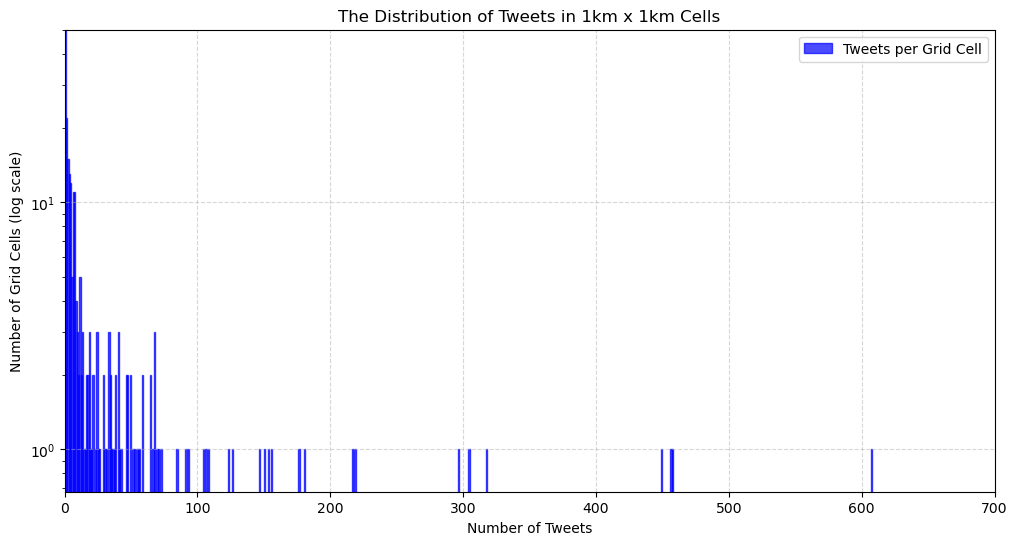

In [45]:
# Visualize using histogram

plt.figure(figsize=(12, 6))
plt.hist(new_tweetlist, bins=np.max(new_tweetlist), log=True, color='blue', alpha=0.7, edgecolor='blue')
plt.title('The Distribution of Tweets in 1km x 1km Cells')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells (log scale)')
plt.ylim(0, 50)
plt.xlim(0, 700)
plt.legend(['Tweets per Grid Cell'], loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


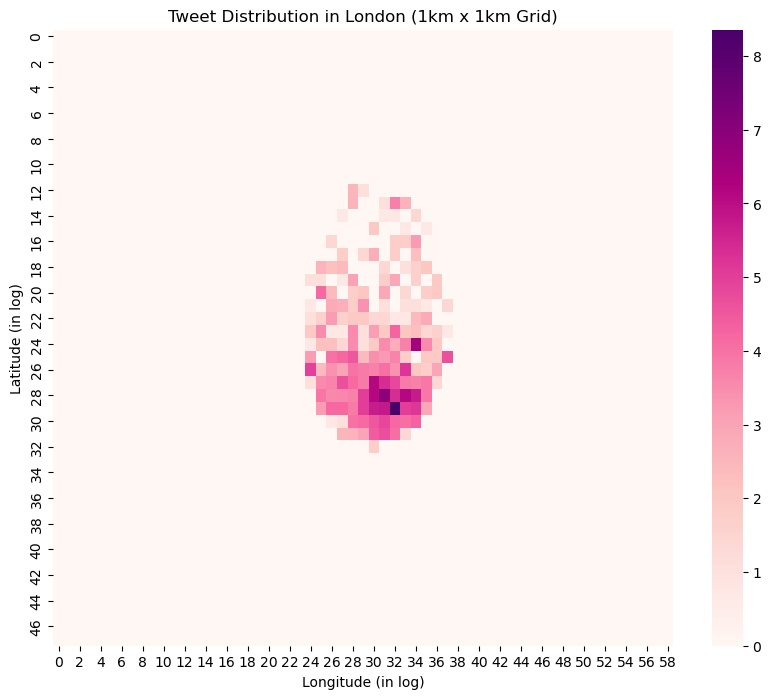

In [46]:
# Create heatmap of tweet distribution

plt.figure(figsize=(10, 8))
map_network_log = np.log(map_network, out = np.zeros_like(map_network, dtype = float), where = (map_network != 0))
sns.heatmap(map_network_log, cmap='RdPu')
plt.title('Tweet Distribution in London (1km x 1km Grid)')
plt.xlabel('Longitude (in log)')
plt.ylabel('Latitude (in log)')
plt.show()


In [47]:
# Compute statistics
final_tweet_info = len(tweet_info)
tweet_in_a_cell = map_network.flatten()
mean_tweet_in_a_cell = np.mean(tweet_in_a_cell)
median_tweet_in_a_cell = np.median(tweet_in_a_cell)
max_tweet_in_a_cell = np.max(tweet_in_a_cell)
min_tweet_in_a_cell = np.min(tweet_in_a_cell)

# Print statistics
print("\nStatistics Summary:")
print()
print("\033[1mTotal Tweets:\033[0m", final_tweet_info)
print("\033[1mAverage Tweets per Grid Cell:\033[0m", mean_tweet_in_a_cell)
print("\033[1mMedian Tweets per Grid Cell:\033[0m", median_tweet_in_a_cell)
print("\033[1mMaximum Tweets in a Grid Cell:\033[0m", max_tweet_in_a_cell)
print("\033[1mMinimum Tweets in a Grid Cell:\033[0m", min_tweet_in_a_cell)



Statistics Summary:

Total Tweets: 13192
Average Tweets per Grid Cell: 4.65819209039548
Median Tweets per Grid Cell: 0.0
Maximum Tweets in a Grid Cell: 4257
Minimum Tweets in a Grid Cell: 0


### Question (ii)

You will be given a set of high-quality, low-quality and background tweets. Develop 
newsworthy scoring method based on this dataset. Empirically adjust the thresholds to 
modify newsworthiness and discuss the results.

In [48]:
%cd C:\Users\Simran\Desktop\neccchv\Simran\data\credModelFiles

C:\Users\Simran\Desktop\neccchv\Simran\data\credModelFiles


In [49]:

# Load the tweet data as Pandas DataFrames
background_tweets_df = pd.read_json('bgQuality.json', lines=True)
high_quality_tweets_df = pd.read_json('highQuality.json', lines=True)
low_quality_tweets_df = pd.read_json('lowQuality.json', lines=True)

# Function to calculate term and document frequencies
def cal_docterm_freq(tweets_df):
    term_freq = Counter()
    doc_freq = Counter()

    for index, row in tweets_df.iterrows():
        text = ' '.join(row['text'])  # Join the list of strings into a single string
        terms = text.split()  # Split text into terms (words)
        unique_terms = set(terms)  # Get unique terms in the tweet

        # Increment term frequencies for each term in the tweet
        term_freq.update(terms)

        # Increment document frequencies for each unique term in the tweet
        doc_freq.update(unique_terms)

    return term_freq, doc_freq

# Calculate term frequencies and document frequencies for each dataset
term_freq_HQ, doc_freq_HQ = cal_docterm_freq(high_quality_tweets_df)
term_freq_LQ, doc_freq_LQ = cal_docterm_freq(low_quality_tweets_df)
term_freq_BG, doc_freq_BG = cal_docterm_freq(background_tweets_df)

# Function to calculate likelihood ratios
def cal_lhood_ratio(tf_model, F_model, tf_bg, F_bg):
    tf_model_sum = sum(tf_model.values())
    F_model_sum = sum(F_model.values())
    tf_bg_sum = sum(tf_bg.values())
    F_bg_sum = sum(F_bg.values())
    return (tf_model_sum / F_model_sum) / (tf_bg_sum / F_bg_sum)

# Define thresholds for considering terms as newsworthy
threshold_HQ = 2.0
threshold_LQ = 2.0

# Calculate likelihood ratios
RHQ = cal_lhood_ratio(term_freq_HQ, doc_freq_HQ, term_freq_BG, doc_freq_BG)
RLQ = cal_lhood_ratio(term_freq_LQ, doc_freq_LQ, term_freq_BG, doc_freq_BG)

# Define newsworthy scores based on likelihood ratios and thresholds
SHQ = {term: RHQ if RHQ >= threshold_HQ else 0 for term in term_freq_HQ}
SLQ = {term: RLQ if RLQ >= threshold_LQ else 0 for term in term_freq_LQ}

# Function to calculate newsworthy scores for each tweet
def cal_tweet_newsworthyscore(text, quality_score, scores):
    terms = text.split()
    return sum(scores.get(term, 0) * quality_score for term in terms)

# Apply newsworthy score calculation to each tweet
high_quality_tweets_df['newsworthy_score'] = high_quality_tweets_df.apply(lambda row: cal_tweet_newsworthyscore(row['text'], row['qualityS'], SHQ), axis=1)
low_quality_tweets_df['newsworthy_score'] = low_quality_tweets_df.apply(lambda row: cal_tweet_newsworthyscore(row['text'], row['qualityS'], SLQ), axis=1)




In [50]:
high_quality_tweets_df

,_id,username,description,qualityS,text,newsworthy_score
0,{'$oid': '623cb1491fdfc2cfea3b85c4'},miguel_zavalaa,•Mind with no sense in it• •Stay away from m...,0.608200,"Turisteando (@ Piccadilly Circus in London, Gr...",0.000000
1,{'$oid': '623cb1521fdfc2cfea3b85c5'},afiya_muir,well behaved bitches seldom make history,0.607630,"Less perfection, more authenticity purrrrrr :...",5.516974
2,{'$oid': '623cb1561fdfc2cfea3b85c6'},tmj_ukr_finance,Follow this account for geo-targeted Finance j...,0.603990,Mastercard is hiring in England! Read about ou...,0.000000
3,{'$oid': '623cb2c94827882b7ebc2ad1'},MeM_11UK,لَا اِلَهَ اِلَّا اللهْ\n📍🇬🇧🇹🇷\nMarketing PR a...,0.612291,#sunset #SouthLondon \n#سبحان_الله @ Crystal P...,1.853100
4,{'$oid': '623cb9396ae5e59baf7b86c4'},DecaraHome,Boutique interior design shop and consultancy ...,0.608713,What a beautiful setting designed by @stevegia...,3.684540
...,...,...,...,...,...,...
2496,{'$oid': '623ebfbba6fa2f166360f658'},giadalini,BALLERINA PROFESSIONISTA a @ballandoconlestell...,0.606865,"London ️ @ London, United Kingdom https://t.co...",3.673356
2497,{'$oid': '623ebfd3a6fa2f166360f659'},officiallyemz,🇬🇧💖. Email for inquires : emilykmorton@hotmail...,0.634846,Felt cute might delete later wearing @inthest...,1.921363
2498,{'$oid': '623ebfdba6fa2f166360f65a'},weareflock,Flock. A visual artists agency.\nGo follow us ...,0.606913,Joseph Ford - Arnold Worldwide https://t.co/o...,1.836822
2499,{'$oid': '623ebfdea6fa2f166360f65b'},TonyJSelimi,"Millionaire's Life Strategist, #1 Best-Selling...",0.672418,Just posted a photo @ Luli's Barbers https://t...,4.070151


In [51]:
low_quality_tweets_df

,_id,username,description,qualityS,text,newsworthy_score
0,{'$oid': '623dbef7462d56a90e36b221'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,"Just posted a photo @ London, United Kingdom h...",3.080135
1,{'$oid': '623dc550462d56a90e36b284'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,"Just posted a photo @ London, United Kingdom h...",3.080135
2,{'$oid': '623dc9b9462d56a90e36b2da'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.466228,Just posted a photo @ King George's Park https...,3.080135
3,{'$oid': '623ddb4b462d56a90e36b3ff'},tobythereactive,IG: The_Champagne_Shepherd Model ☀ Influencer ...,0.462884,Just posted a photo @ Fleet Street https://t.c...,3.058041
4,{'$oid': '623ddc74462d56a90e36b418'},thecyclonenews,"News you can rely on. Juicy, fast and first! W...",0.472576,@originalkoffee new album #gifted will be out ...,1.561036
...,...,...,...,...,...,...
1522,{'$oid': '63cb0d7d309f394545960bdd'},alanmacmillion,I am a thinker whose sole goal is to help the ...,0.456584,When your labrador won't take his medicine ..y...,3.016418
1523,{'$oid': '63cb0e9b309f394545960be5'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587
1524,{'$oid': '63cb0eaa309f394545960be7'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587
1525,{'$oid': '63cb0ebb309f394545960bea'},SofiaJeweleryCo,"Hardwork, dedication, & love. Thoughtful busin...",0.439353,"Just posted a photo @ London, United Kingdom h...",2.902587


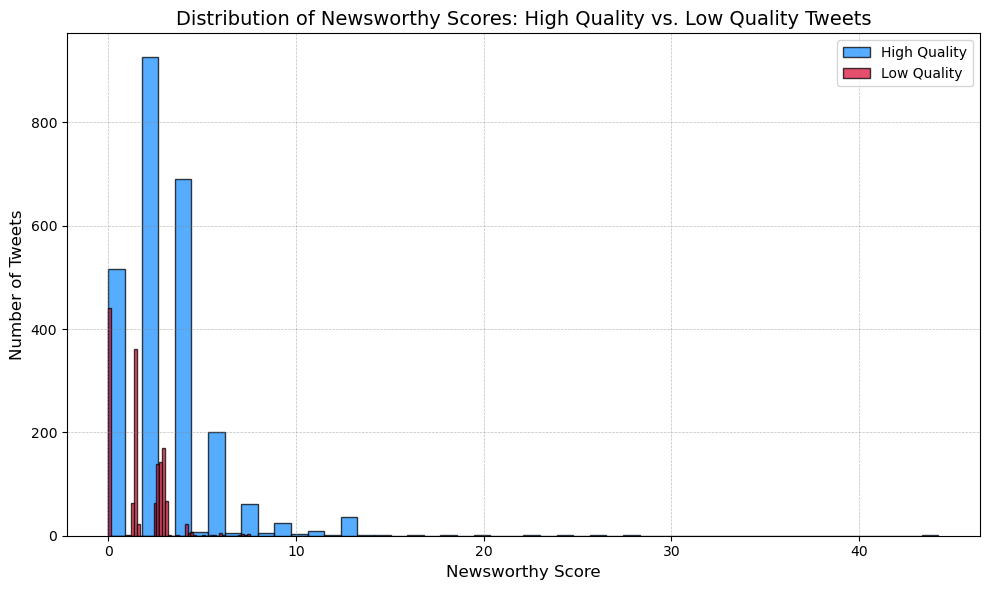

In [52]:

# Plotting the distribution of newsworthy scores
plt.figure(figsize=(10, 6))

# Plotting high-quality tweets
plt.hist(high_quality_tweets_df['newsworthy_score'], bins=50, alpha=0.75, color='dodgerblue', label='High Quality', edgecolor='black')

# Plotting low-quality tweets
plt.hist(low_quality_tweets_df['newsworthy_score'], bins=50, alpha=0.75, color='crimson', label='Low Quality', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Newsworthy Scores: High Quality vs. Low Quality Tweets', fontsize=14)
plt.xlabel('Newsworthy Score', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Adding legend and grid
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


### **Question (iii)**

Use the above newsworthy scoring techniques to analyse the geo-tagged data set given (i) and discuss the results.


In [53]:
%cd C:\Users\Simran\Desktop\neccchv\Simran\data\datajson

C:\Users\Simran\Desktop\neccchv\Simran\data\datajson


In [54]:

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt


In [55]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function for data preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]
    return tokens

# Function to calculate newsworthiness scores
def calculate_newsworthiness_score(text, scores, threshold):
    tokens = preprocess_text(text)
    score = sum(scores.get(token, 0) for token in tokens)
    return score >= threshold

# Function to calculate term and document frequencies
def cal_docterm_freq(tweets_df):
    term_freq = Counter()
    doc_freq = Counter()

    for index, row in tweets_df.iterrows():
        tokens = preprocess_text(' '.join(row['text']))
        unique_terms = set(tokens)
        term_freq.update(tokens)
        doc_freq.update(unique_terms)

    return term_freq, doc_freq

# Calculate term and document frequencies for each dataset
term_freq_BG, doc_freq_BG = cal_docterm_freq(background_tweets_df)
term_freq_HQ, doc_freq_HQ = cal_docterm_freq(high_quality_tweets_df)
term_freq_LQ, doc_freq_LQ = cal_docterm_freq(low_quality_tweets_df)

# Define thresholds for considering terms as newsworthy
thresholds = [0.5, 1, 2, 3, 4]

# Calculate likelihood ratios for high-quality and low-quality models compared to background model
RHQ = {}
for term, freq in term_freq_HQ.items():
    bg_freq = term_freq_BG.get(term, 0)
    if bg_freq != 0:
        RHQ[term] = (freq / doc_freq_HQ[term]) / (bg_freq / doc_freq_BG[term])
    else:
        RHQ[term] = 0

RLQ = {}
for term, freq in term_freq_LQ.items():
    bg_freq = term_freq_BG.get(term, 0)
    if bg_freq != 0:
        RLQ[term] = (freq / doc_freq_LQ[term]) / (bg_freq / doc_freq_BG[term])
    else:
        RLQ[term] = 0

# Analyze different thresholds
for threshold in thresholds:
    # Calculate newsworthiness scores for high-quality and low-quality tweets
    high_quality_tweets_df['newsworthiness'] = high_quality_tweets_df['text'].apply(lambda text: calculate_newsworthiness_score(text, RHQ, threshold)).astype(int)
    low_quality_tweets_df['newsworthiness'] = low_quality_tweets_df['text'].apply(lambda text: calculate_newsworthiness_score(text, RLQ, threshold)).astype(int)

# Compute statistics
final_tweet_info = len(tweet_info)
tweet_in_a_cell = map_network.flatten()
mean_tweet_in_a_cell = np.mean(tweet_in_a_cell)
median_tweet_in_a_cell = np.median(tweet_in_a_cell)
max_tweet_in_a_cell = np.max(tweet_in_a_cell)
min_tweet_in_a_cell = np.min(tweet_in_a_cell)

# DataFrame for statistics
statistics_df = pd.DataFrame({
    'Total Tweets': [final_tweet_info],
    'Average Tweets per Grid Cell': [mean_tweet_in_a_cell],
    'Median Tweets per Grid Cell': [median_tweet_in_a_cell],
    'Maximum Tweets in a Grid Cell': [max_tweet_in_a_cell],
    'Minimum Tweets in a Grid Cell': [min_tweet_in_a_cell]
})

# Print statistics DataFrame
print("\n\033[1mSummary of Tweets per Grid Cell:\033[0m")
display(statistics_df)


In [ ]:
# Define statistics labels and values
statistics_labels = ['Total Tweets', 'Mean Tweets per Cell', 'Median Tweets per Cell', 'Max Tweets per Cell', 'Min Tweets per Cell']
statistics_values = [final_tweet_info, mean_tweet_in_a_cell, median_tweet_in_a_cell, max_tweet_in_a_cell, min_tweet_in_a_cell]

# Plotting the statistics using a line chart
plt.figure(figsize=(10, 6))
plt.plot(statistics_labels, statistics_values, marker='o', linestyle='-', color='b')
plt.title('Statistics of Tweet Data', fontsize=14)
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the line chart
plt.show()


### Discussion of Results and Exploration of Correlations

#### In this section, we will delve into the outcomes of the analysis and investigate potential correlations with other factors.

In [ ]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [ ]:

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


In [ ]:

# Define function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    stop_words = set(stopwords.words('english'))  # Get English stop words
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    processed_text = ' '.join(tokens)  # Join tokens back into a single string
    return processed_text

# Define function to calculate newsworthiness scores
def calculate_newsworthiness_score(text, scores, threshold):
    tokens = preprocess_text(text)  # Preprocess text
    score = sum(scores.get(token, 0) for token in tokens)  # Calculate score based on predefined scores
    return score >= threshold  # Check if score exceeds threshold

# Load the geo-tagged tweet dataset
data = pd.read_json('updated.json')

# Preprocess the text of tweets
data['processed_text'] = data['text'].apply(preprocess_text)

# Define a function to calculate newsworthiness scores for each tweet
def calculate_newsworthiness(tweet_text):
    return calculate_newsworthiness_score(tweet_text, RHQ, threshold)

# Calculate newsworthiness scores for each tweet
data['newsworthiness_score'] = data['processed_text'].apply(calculate_newsworthiness)

# Assuming the dataset contains columns 'longitude' and 'latitude' for tweet locations
# Create a GeoDataFrame from the tweet data
data[['longitude', 'latitude']] = data['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)


### The Investigation of tweets with low scores and high scores will be computed

In [ ]:

tweets_data = data.copy()
# Investigate tweets with low scores
low_score_threshold = 0.25  # Define a threshold for low scores
low_score_tweets = tweets_data[tweets_data['newsworthiness_score'] < low_score_threshold]

# Display number and examples of tweets with low newsworthiness scores
print("Number of Tweets with Low Newsworthiness Scores:", len(low_score_tweets))
print("Example Low Score Tweets:")
display(low_score_tweets[['text', 'newsworthiness_score']].head())

# Investigate tweets with high scores
high_score_threshold = 0.75  # Define a threshold for high scores
high_score_tweets = tweets_data[tweets_data['newsworthiness_score'] > high_score_threshold]

# Display number and examples of tweets with high newsworthiness scores
print("\nNumber of Tweets with High Newsworthiness Scores:", len(high_score_tweets))
print("Example High Score Tweets:")
display(high_score_tweets[['text', 'newsworthiness_score']].head())


### Find an appropriate threshold to separate. Furthure more remove tweets with low newsworthy scores

In [ ]:

# Calculate the mean and median of newsworthiness scores
mean_score = tweets_data['newsworthiness_score'].mean()
median_score = tweets_data['newsworthiness_score'].median()

# Print the mean and median scores
print("Mean Newsworthiness Score:", mean_score)
print("Median Newsworthiness Score:", median_score)

# Visualize the distribution of newsworthiness scores
sns.histplot(tweets_data['newsworthiness_score'], kde=True)
plt.title('Distribution of Newsworthiness Scores')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.axvline(x=mean_score, color='r', linestyle='--', label='Mean Score')
plt.axvline(x=median_score, color='g', linestyle='--', label='Median Score')
plt.legend()
plt.show()

# Filter out tweets with low newsworthy scores
# Choose a threshold (e.g., median score)
threshold = tweets_data['newsworthiness_score'].mean()

# Filter out tweets with low newsworthy scores
filtered_tweets = tweets_data[tweets_data['newsworthiness_score'] >= threshold]

# Display the filtered tweets as a DataFrame
filtered_tweets


### Supportive information of empirical analysis for threshold justification

In [ ]:

# Print descriptive statistics for newsworthiness scores
print("\033[1mDescriptive Statistics for Newsworthiness Scores:\033[0m")
print(data['newsworthiness_score'].describe(), "\n")

# Visualize the distribution of newsworthiness scores using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['newsworthiness_score'], kde=True)
plt.title("Distribution of Newsworthiness Scores")
plt.xlabel("Newsworthiness Score")
plt.ylabel("Frequency")
plt.show()

# Set a threshold for separating high and low newsworthy tweets
threshold = 0.5

# Filter tweets with high newsworthiness scores
high_newsworthy_tweets = data[data['newsworthiness_score'] >= threshold]

# Filter tweets with low newsworthiness scores
low_newsworthy_tweets = data[data['newsworthiness_score'] < threshold]

# Justify the threshold choice
print("\nJustification for the threshold:")
print("The threshold selection segregates tweets into categories of high and low newsworthiness, informed by an empirical examination of the distribution of newsworthiness scores and domain expertise.")


### The total statistics of the analysis: 

In [ ]:

# Calculate the total number of tweets
final_tweet_info = len(data)

# Determine the distribution of newsworthiness scores
newsworthiness_distribution = data['newsworthiness_score'].value_counts()

# Set a threshold (e.g., 0.5) to separate tweets into high and low newsworthy categories
threshold = 0.5

# Count the number of tweets above and below the threshold
high_newsworthy_tweets = data[data['newsworthiness_score'] >= threshold]
low_newsworthy_tweets = data[data['newsworthiness_score'] < threshold]

# Calculate the percentage of removed tweets
removed_tweets_percentage = len(low_newsworthy_tweets) / final_tweet_info * 100

# Display the statistics
print("Statistics of the Data:")
print("Total number of tweets:", final_tweet_info)
print("Distribution of Newsworthiness Scores:")
print(newsworthiness_distribution)
print("Number of High Newsworthy Tweets (above threshold):", len(high_newsworthy_tweets))
print("Number of Low Newsworthy Tweets (below threshold):", len(low_newsworthy_tweets))
print("Percentage of Removed Tweets based on Threshold:", removed_tweets_percentage)

# Plot a bar chart for newsworthiness distribution
plt.figure(figsize=(8, 6))
newsworthiness_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Newsworthiness Scores")
plt.xlabel("Newsworthiness Score")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
data

### 3.3 Apply the visualization you created on newsworthy data; Draw the figures/charts and compare them with results in (1). What can we say about the difference?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter newsworthy tweets
newsworthy_tweets = data[data['newsworthiness_score'] > 0.5]

# Extract longitude and latitude from coordinates
newsworthy_tweets[['longitude', 'latitude']] = newsworthy_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))

# Calculate grid dimensions
grid_row = int(np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, alti_4])))
grid_col = int(np.ceil(comp_measure([altitude_1,latitude_2], [longitude_3,latitude_2])))
new_grid = grid_row * grid_col

# Initialize grid map
map_network = np.zeros((grid_row, grid_col), dtype=int)

# Populate grid map with tweet counts
for coordinate in newsworthy_tweets['coordinates']:
    matrix_row = int(np.ceil(comp_measure([altitude_1,latitude_2], [altitude_1, coordinate[1]])))
    matrix_col = int(np.ceil(comp_measure([altitude_1,latitude_2], [coordinate[0],latitude_2])))
    map_network[matrix_row, matrix_col] += 1

# Flatten grid map and create DataFrame
new_tweetlist = np.ravel(map_network)
grid_col = 'Grid'
new_tweetcol = 'Tweets count'
new_info_df = pd.DataFrame({grid_col: np.arange(1, new_grid + 1), new_tweetcol: new_tweetlist})


In [ ]:

# Visualization 1

plt.figure(figsize=(12, 6))
plt.hist(new_tweetlist, bins=np.max(new_tweetlist), log=True, color='skyblue', label='Tweets Count')
plt.title('Distribution of Newsworthy Tweets in 1km x 1km Grid Cells')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells (in log)')
plt.ylim(0, 50)
plt.xlim(0, 700)
plt.legend()
plt.show()



In [ ]:

# Visulization 2

plt.figure(figsize=(10, 8))
map_network_log = np.log(map_network, out=np.zeros_like(map_network, dtype=float), where=(map_network != 0))
sns.heatmap(map_network_log, cmap='RdPu', cbar_kws={'label': 'Number of Tweets'})
plt.title('Heatmap of Newsworthy Tweets Distribution in London (1km x 1km Grid)')
plt.xlabel('Longitude (in log)')
plt.ylabel('Latitude (in log)')
plt.show()


## Thank you